In [29]:
#Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data using pandas
df = pd.read_csv(r"C:\Users\Apelu\OneDrive\Desktop\Medical Cost Personal Insurance  FlipRobo Project\medical_cost_insurance.csv")

In [3]:
# Displaying the first few rows of the DataFrame for a quick overview
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Displaying the last few rows of the DataFrame for a quick overview
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# Looking for missing data present
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Checking to have a brief statistical information of the data
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
# Displaying variable in the data set 
column_count = df.columns
total_variable = len(column_count)
print(column_count)
total_variable

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


7

In [8]:
df.nunique().to_frame("Unique Values")

,Unique Values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


<Axes: xlabel='charges', ylabel='Density'>

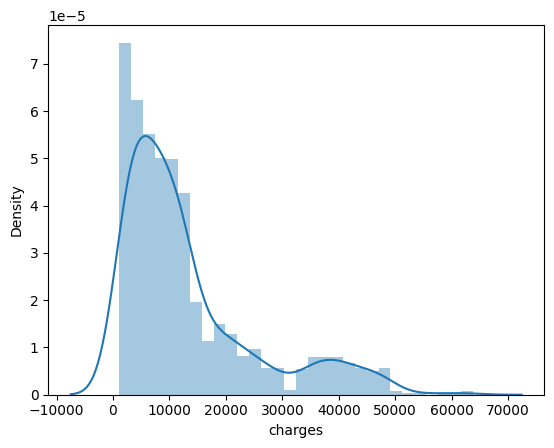

In [9]:
sns.distplot(df['charges'])

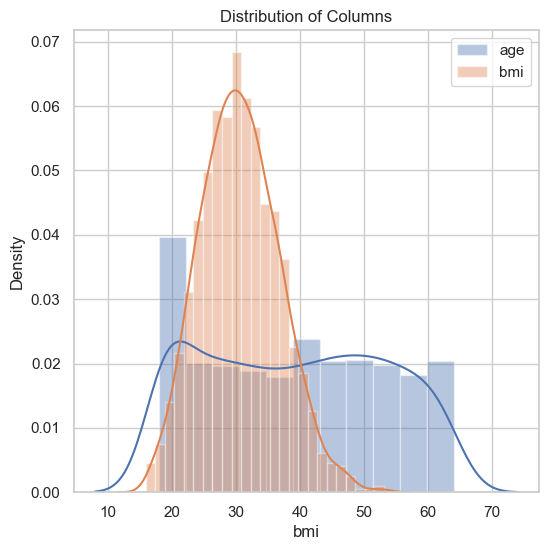

In [10]:
# Creating distribution plot for item_list.
sns.set(style = 'whitegrid')
plt.figure(figsize = (6,6))

item_list = ['age', 'bmi']
for columns in item_list:
    sns.distplot(df[columns], kde = True, label = columns)

plt.legend()
plt.title('Distribution of Columns')
plt.show()

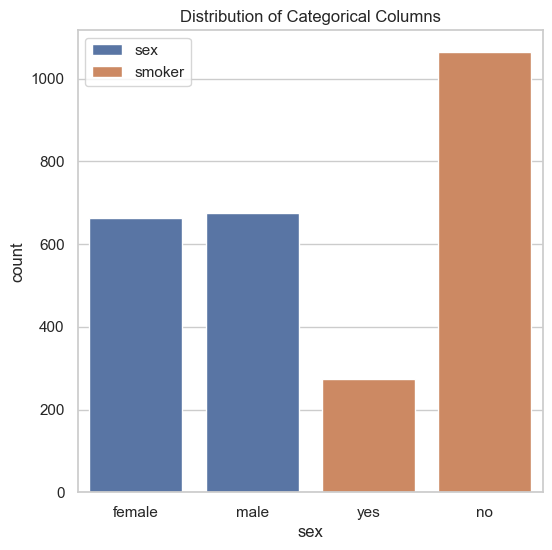

In [11]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))

item_list = ['sex', 'smoker']
for column in item_list:
    sns.countplot(x=df[column], label=column)

plt.legend()
plt.title('Distribution of Categorical Columns')
plt.show()


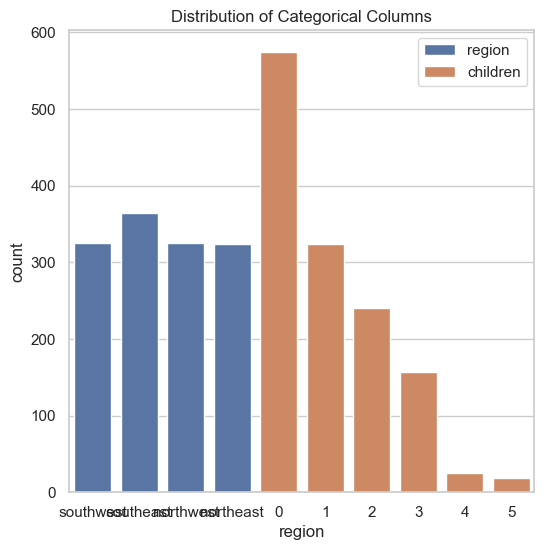

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))

item_list = ['region', 'children']
for column in item_list:
    sns.countplot(x=df[column], label=column)

plt.legend()
plt.title('Distribution of Categorical Columns')
plt.show()


In [13]:
# Calculate skewness for a specific column in the DataFrame
variable_list = ['age', 'bmi', 'children', 'charges']
for item in variable_list:
    skewness_value = df[item].skew()
    # Print or use the skewness value as needed
    print(f"Skewness for '{item}': {skewness_value}")

Skewness for 'age': 0.05567251565299186
Skewness for 'bmi': 0.2840471105987448
Skewness for 'children': 0.9383804401702414
Skewness for 'charges': 1.5158796580240388


Age: The age distribution appears relatively balanced, 
with no clear skewness. This is typical for age distributions in many datasets.

BMI: The right skewness in BMI suggests that there might be a concentration of
individuals with lower BMI values, while a smaller number of individuals have higher BMI values.

Children: The right skewness in the number of children suggests that most individuals
have fewer children, but a long tail represents families with more children.

Charges: The right skewness in medical charges indicates that the majority of cases
have lower charges, but there is a long tail of higher charges.

Solutions: 
I will apply a log transformation to 'bmi' and 'charges' to reduce the right skewness.
This can be particularly effective when dealing with features that exhibit
exponential growth.

I will consider discretizing 'children' into categories or bins to handle 
It's right skewness.

In [13]:
# Log Transformation on BMI and Charges

df['bmi_log'] = np.log1p(df['bmi'])
df['charges_log'] = np.log1p(df['charges'])


In [14]:
# Discretizing children
df['children_binned'] = pd.cut(df['children'], bins=[-1, 0, 1, 2, np.inf], labels=['0', '1', '2', '3'])


In [15]:
# Identifying and categorising data type
categorical_df = [] 
for item in df.dtypes.index:
    if df.dtypes[item] == 'O':
        categorical_df.append(item)
print('Categorical',categorical_df)
numeric_data = []
for items in df.dtypes.index:
    if df.dtypes[items] == 'int64' or df.dtypes[items] == 'float64':
        numeric_data.append(items)
print('Numeric',numeric_data)

Categorical ['sex', 'smoker', 'region']
Numeric ['age', 'bmi', 'children', 'charges']


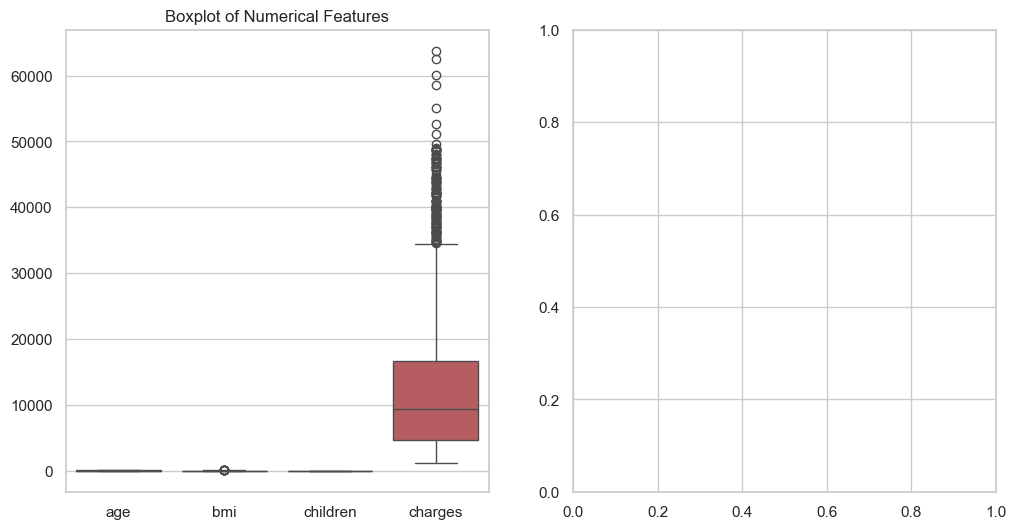

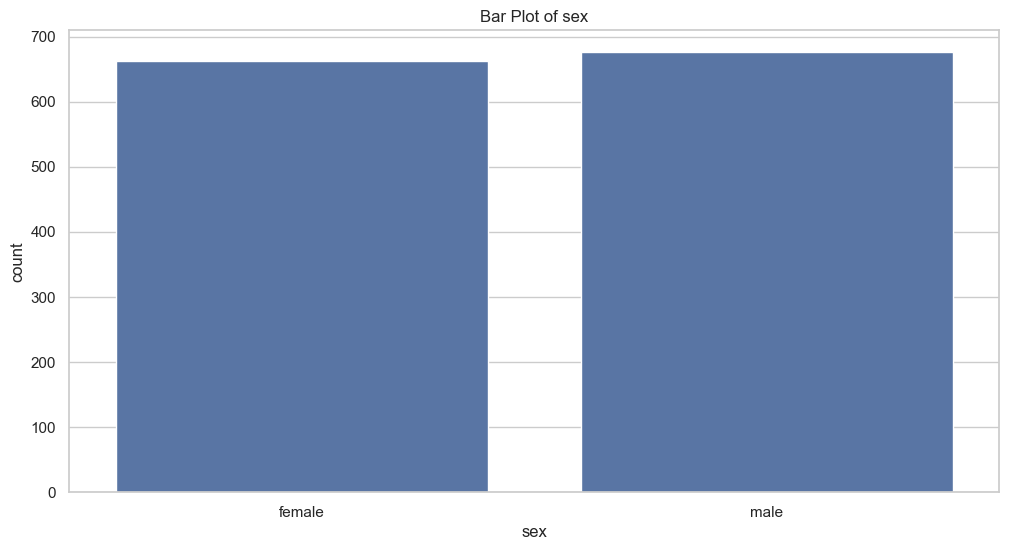

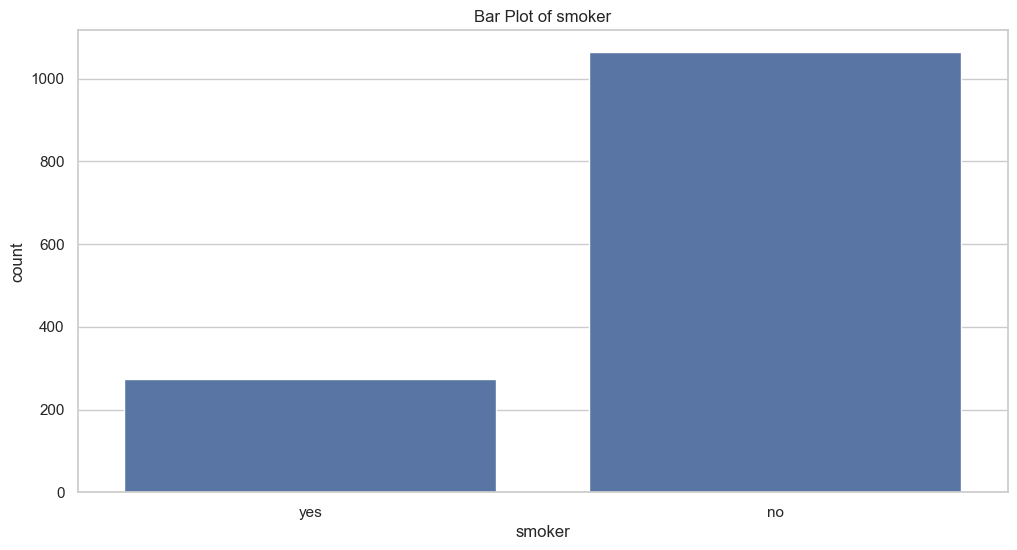

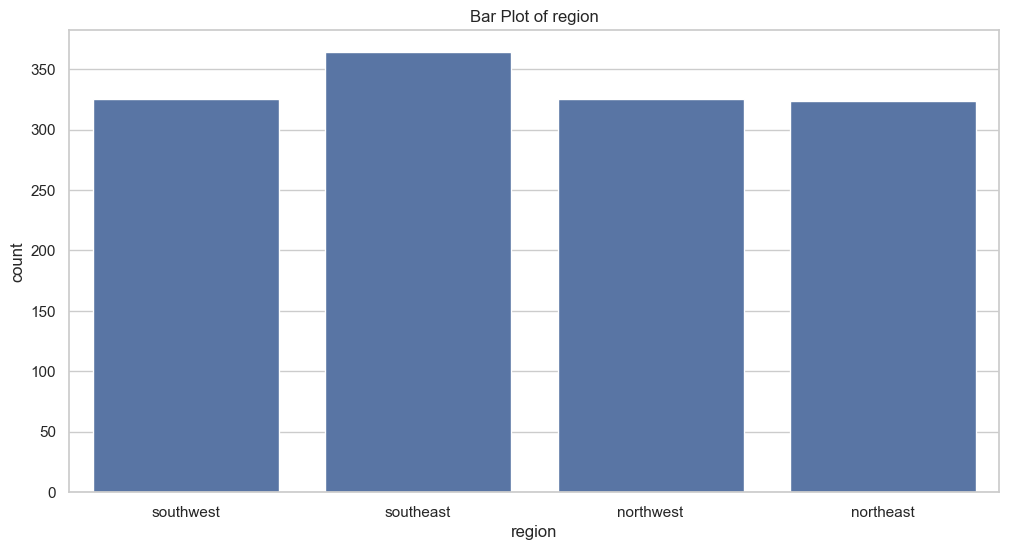

Rows with numerical outliers:
      age     sex     bmi  children smoker     region      charges  \
14     27    male  42.130         0    yes  southeast  39611.75770   
19     30    male  35.300         0    yes  southwest  36837.46700   
23     34  female  31.920         1    yes  northeast  37701.87680   
29     31    male  36.300         2    yes  southwest  38711.00000   
30     22    male  35.600         0    yes  southwest  35585.57600   
...   ...     ...     ...       ...    ...        ...          ...   
1301   62    male  30.875         3    yes  northwest  46718.16325   
1303   43    male  27.800         0    yes  southwest  37829.72420   
1313   19  female  34.700         2    yes  southwest  36397.57600   
1317   18    male  53.130         0     no  southeast   1163.46270   
1323   42  female  40.370         2    yes  southeast  43896.37630   

     children_binned  
14                 0  
19                 0  
23                 1  
29                 2  
30            

In [16]:
# df is the DataFrame
numeric_features = df.select_dtypes(include=['int64', 'float64'])
categorical_features = df.select_dtypes(include=['object'])

# Identify and visualize outliers in numerical data using a boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=numeric_features)
plt.title("Boxplot of Numerical Features")

# Identify and visualize unusual categories in categorical data using a bar plot
plt.subplot(1, 2, 2)
for column in categorical_features.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=df)
    plt.title(f"Bar Plot of {column}")

plt.show()

# Outlier detection for numerical data
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1

# Define a condition to filter outliers for numerical features
outlier_condition_numeric = ((numeric_features < (Q1 - 1.5 * IQR)) | (numeric_features > (Q3 + 1.5 * IQR)))

# Display rows containing outliers for numerical features
outliers_numeric = df[outlier_condition_numeric.any(axis=1)]
print("Rows with numerical outliers:")
print(outliers_numeric)


I will be replacing outliers with the median is one of the strategies to handle extreme values, and it can be a reasonable choice because of
the nature of Charges. Here are some reasons why replacing outliers with the median might be considered: The median is a robust measure of
central tendency, meaning it is less sensitive to extreme values compared to the mean.

In [18]:
# df DataFrame
# Replace 'charges' with the actual log-transformed column name
column = 'charges'

# Identify outliers using the IQR method
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define a condition to filter outliers
outlier_condition = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))

# Replace outliers with the median
median_val = df[column].median()
df['charges_log_imputed'] = np.where(outlier_condition, median_val, df[column])


In [22]:
# Drop the 'charges' column
df = df.drop('charges', axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  1338 non-null   int64   
 1   sex                  1338 non-null   object  
 2   bmi                  1338 non-null   float64 
 3   children             1338 non-null   int64   
 4   smoker               1338 non-null   object  
 5   region               1338 non-null   object  
 6   children_binned      1338 non-null   category
 7   charges_log_imputed  1338 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 74.8+ KB


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


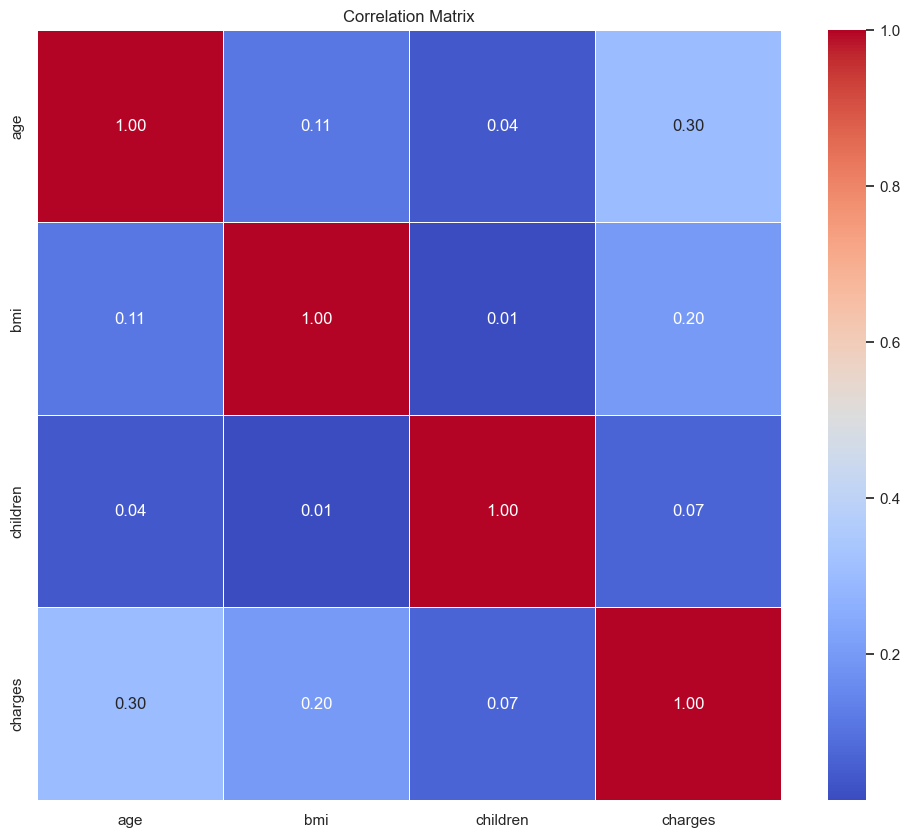

In [24]:
# Correlation Analysis for X is the DataFrame
correlation_matrix = numeric_features.corr()
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [28]:
# Extract features (X) and target variable (y)
X = df[['sex', 'region', 'age', 'bmi', 'children_binned', 'smoker']]
y = df['charges_log_imputed']
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['sex', 'region', 'smoker'], drop_first=True)

# Standardize features
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

In [30]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear = linear_reg_model.predict(X_test)

# Gradient Boosting Regression
grad_boost_model = GradientBoostingRegressor(random_state=42)
grad_boost_model.fit(X_train, y_train)
y_pred_grad_boost = grad_boost_model.predict(X_test)

# Support Vector Machine (SVM)
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\n  Mean Squared Error: {mse:.4f}\n  R-squared: {r2:.4f}")

evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_grad_boost, "Gradient Boosting Regression")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine (SVM)")


Linear Regression:
  Mean Squared Error: 28383963.9695
  R-squared: 0.4349
Gradient Boosting Regression:
  Mean Squared Error: 20578901.0634
  R-squared: 0.5903
Support Vector Machine (SVM):
  Mean Squared Error: 46177074.5131
  R-squared: 0.0807


Gradient Boosting Regression exhibits superior performance with the lowest Mean Squared Error (20,578,901.0634) 
and highest R-squared (0.5903). Linear Regression follows with a higher MSE (28,383,963.9695) and lower R-squared (0.4349). 
Support Vector Machine (SVM) trails behind with the highest MSE (46,177,074.5131) and the lowest R-squared (0.0807). 
Overall, Gradient Boosting Regression demonstrates better accuracy and explanatory power compared to Linear Regression and SVM for the given dataset.

The Gradient Boosting Regression model appears to be relatively effective for prediction based on the provided metrics.
It has the lowest Mean Squared Error (a measure of prediction accuracy) and the highest R-squared (indicating better explanatory power).


In [39]:
# Hypothetical input values for a new individual
new_individual = {
    'age': 30,
    'bmi': 25,
    'children': 2,
    'smoker': 1,  # 0 for non-smoker, 1 for smoker
    'region': 'southwest' 
}

# Convert the input data to a DataFrame
new_data_df = pd.DataFrame([new_individual])

# One-hot encode the 'region' feature
new_data_df = pd.get_dummies(new_data_df, columns=['region'], drop_first=True)

# Ensure the new data has the same number of columns as the training data
expected_columns = X_train.shape[1]
new_data_df = new_data_df.reindex(columns=np.arange(expected_columns), fill_value=0)

# Linear Regression
predicted_price_linear = linear_reg_model.predict(new_data_df)

# Gradient Boosting Regression
predicted_price_grad_boost = grad_boost_model.predict(new_data_df)

# Support Vector Machine (SVM)
predicted_price_svm = svm_model.predict(new_data_df)

# Print the predicted prices
print(f"Linear Regression Predicted Price: {predicted_price_linear[0]:.4f}")
print(f"Gradient Boosting Predicted Price: {predicted_price_grad_boost[0]:.4f}")
print(f"SVM Predicted Price: {predicted_price_svm[0]:.4f}")


Linear Regression Predicted Price: 9914.4983
Gradient Boosting Predicted Price: 6804.4420
SVM Predicted Price: 8578.9896


Conclusively, the Gradient Boosting model forecasts a price of 6804.4420, representing a prediction for insurance costs for a 'new_individual.'.
It's important to note that this value is adjustable to accommodate predictions for other individuals based on their unique characteristics.